#Make imports

In [1]:
!pip install autogluon holidays

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import autogluon
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame
import holidays as hd

#Device Information

In [3]:
!nvidia-smi

Thu Jan 23 06:48:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#Visualziing data

##Printing all datsets

In [4]:
original_train_data = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')
print(f"The training data has {original_train_data.shape[0]} rows")
original_train_data.head(10)

The training data has 230130 rows


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
6,6,2010-01-01,Canada,Stickers for Less,Kaggle,1837.0
7,7,2010-01-01,Canada,Stickers for Less,Kaggle Tiers,1659.0
8,8,2010-01-01,Canada,Stickers for Less,Kerneler,807.0
9,9,2010-01-01,Canada,Stickers for Less,Kerneler Dark Mode,940.0


In [5]:
test_data = pd.read_csv('/kaggle/input/playground-series-s5e1/test.csv')
print(f"The testing data has {test_data.shape[0]} rows")
print(test_data.head())
print(test_data.tail())

The testing data has 98550 rows
       id        date country              store             product
0  230130  2017-01-01  Canada  Discount Stickers   Holographic Goose
1  230131  2017-01-01  Canada  Discount Stickers              Kaggle
2  230132  2017-01-01  Canada  Discount Stickers        Kaggle Tiers
3  230133  2017-01-01  Canada  Discount Stickers            Kerneler
4  230134  2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode
           id        date    country                 store             product
98545  328675  2019-12-31  Singapore  Premium Sticker Mart   Holographic Goose
98546  328676  2019-12-31  Singapore  Premium Sticker Mart              Kaggle
98547  328677  2019-12-31  Singapore  Premium Sticker Mart        Kaggle Tiers
98548  328678  2019-12-31  Singapore  Premium Sticker Mart            Kerneler
98549  328679  2019-12-31  Singapore  Premium Sticker Mart  Kerneler Dark Mode


In [6]:
submission_format = pd.read_csv('/kaggle/input/playground-series-s5e1/sample_submission.csv')
print(submission_format.shape)
print(submission_format.head())
print(submission_format.tail())

(98550, 2)
       id  num_sold
0  230130       100
1  230131       100
2  230132       100
3  230133       100
4  230134       100
           id  num_sold
98545  328675       100
98546  328676       100
98547  328677       100
98548  328678       100
98549  328679       100


##Checking for NaN values

In [7]:
def check_nan(df:pd.DataFrame):
  # Check for NaN values
  has_nan = df.isnull().any().any()
  return has_nan

In [8]:
print(f"The training data has NaN values: {check_nan(original_train_data)}")
print(f"The testing data has NaN values: {check_nan(test_data)}")

The training data has NaN values: True
The testing data has NaN values: False


In [9]:
original_train_data.isnull().any()

id          False
date        False
country     False
store       False
product     False
num_sold     True
dtype: bool

some num_sold values missing in training data, but cannot remove them will need to fill in values later

In [10]:
# Remove rows where 'num_sold' column has NaN values
#train_data = original_train_data.dropna(subset=['num_sold']).copy()
#print(f"The training data has {train_data.shape[0]} rows")
#train_data.head(10)
#REMOVED ABOVE CODE AS IT LED TO INCOMPLETE DATA
train_data=original_train_data.copy()

##Checking datatypes in the dataframe

In [11]:
#checking datatypes of each column
train_data.dtypes

id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object

In [12]:
# Convert date column to datetime
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date']=pd.to_datetime(test_data['date'])

In [13]:
train_data.describe(include='all')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
count,230130.000000,230130,230130,230130,230130,221259.000000
unique,NaN,NaN,6,3,5,NaN
top,NaN,NaN,Canada,Discount Stickers,Holographic Goose,NaN
freq,NaN,NaN,38355,76710,46026,NaN
mean,115064.500000,2013-07-02 00:00:00,NaN,NaN,NaN,752.527382
min,0.000000,2010-01-01 00:00:00,NaN,NaN,NaN,5.000000
25%,57532.250000,2011-10-02 00:00:00,NaN,NaN,NaN,219.000000
50%,115064.500000,2013-07-02 00:00:00,NaN,NaN,NaN,605.000000
75%,172596.750000,2015-04-02 00:00:00,NaN,NaN,NaN,1114.000000
max,230129.000000,2016-12-31 00:00:00,NaN,NaN,NaN,5939.000000


##Including new variable to get more information

Adding information about a given data in training data is a holiday or not


In [14]:
#make a function to check if a date is a holiday in a specific country or not
def is_holiday(row):
  #get list of holidays in specific country
  country_holidays=hd.country_holidays(row['country'])

  #Return True if date belongs in that list
  return row['date'] in country_holidays

In [15]:
#apply is_holiday on training and testing datasets
train_data['holiday']=train_data.apply(is_holiday, axis=1)
test_data['holiday']=test_data.apply(is_holiday, axis=1)

Add info about following:
1. Weekend or weekday
2. Season
3. Fiscal Quarter
4. Currency Exchange Rate
5. COVID if applicable
6. War if applicable
7. End of Year effect (more spending near new years generally)
8. Start of month effect

In [16]:
#make new column in training data containing day of week
train_data['day_of_week']=train_data['date'].dt.day_name()
test_data['day_of_week']=test_data['date'].dt.day_name()

In [17]:
#getting season on the date
def get_season(date):
  month=date.month
  season='spring' if 3<=month<=5 else 'summer' if 6<=month<=8 else 'autumn' if 9<=month<=11 else 'winter'
  return season

#applying above function on training and testing data
train_data['season']=train_data['date'].apply(get_season)
test_data['season']=test_data['date'].apply(get_season)
train_data['season']

0         winter
1         winter
2         winter
3         winter
4         winter
           ...  
230125    winter
230126    winter
230127    winter
230128    winter
230129    winter
Name: season, Length: 230130, dtype: object

In [18]:
#Make fiscal Quarter Column with 1 from April to June, 2 from July to September, 3 from October to December, 4 January to March
def get_fiscal_quarter(date):
  month = date.month
  quarter= 1 if month in [4,5,6] else 2 if month in [7,8,9] else 3 if month in [10,11,12] else 4 if month in [1,2,3] else 0
  return quarter


#apply above function to training and testing dataset
train_data['fiscal_quarter']=train_data['date'].apply(get_fiscal_quarter)
test_data['fiscal_quarter']=test_data['date'].apply(get_fiscal_quarter)

In [19]:
#Make column to check if date is near new years or not(Between 15 December to 15 January)
def near_new_year(date):
  month=date.month
  day=date.day
  return True if (15<=day<=31 and month==12) or (1<=day<=15 and month==1) else False

#Apply function to both the datasets
train_data['near_new_year']=train_data['date'].apply(near_new_year)
test_data['near_new_year']=test_data['date'].apply(near_new_year)

In [20]:
#Check if date is near start of the month (up till 5th of the month)
def near_start_of_month(date):
  day=date.day
  return True if day<=5 else False

#Apply to both datasets
train_data['near_start_of_month']=train_data['date'].apply(near_start_of_month)
test_data['near_start_of_month']=test_data['date'].apply(near_start_of_month)

##Checking if data is significantly assymetrically distributed around categorical variables or not

In [21]:
# Count the number of rows for each country
country_counts = train_data['country'].value_counts()

# Display the result
print(country_counts)

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64


In [22]:
# Count the number of rows for each country
product_counts = train_data['product'].value_counts()

# Display the result
print(product_counts)

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64


In [23]:
# Count the number of rows for each country
store_counts = train_data['store'].value_counts()

# Display the result
print(store_counts)

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64


In [24]:
print(f'countries in training dataset:{train_data["country"].unique()}')
print(f'countries in testing dataset:{test_data["country"].unique()}')

countries in training dataset:['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
countries in testing dataset:['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']


In [25]:
print(f'stores in training dataset:{train_data["store"].unique()}')
print(f'stores in testing dataset:{test_data["store"].unique()}')

stores in training dataset:['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
stores in testing dataset:['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']


In [26]:
print(f'products in training dataset:{train_data["product"].unique()}')
print(f'products in testing dataset:{test_data["product"].unique()}')

products in training dataset:['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']
products in testing dataset:['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']


In [27]:
print(f' Number of Unique values of all categorical variables:Day of Week:{train_data["day_of_week"].nunique()}, Quarter: {train_data["fiscal_quarter"].nunique()}, Holiday: {train_data["holiday"].nunique()}, New Year: {train_data["near_new_year"].nunique()}, Start of Month: {train_data["near_start_of_month"].nunique()}, Season: {train_data["season"].nunique()}')

 Number of Unique values of all categorical variables:Day of Week:7, Quarter: 4, Holiday: 2, New Year: 2, Start of Month: 2, Season: 4


It seems above that number of data points are not very different in training and testing data

##Attempting more visualization

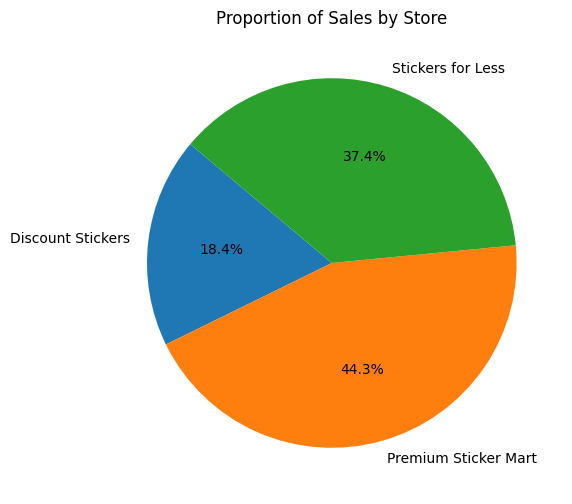

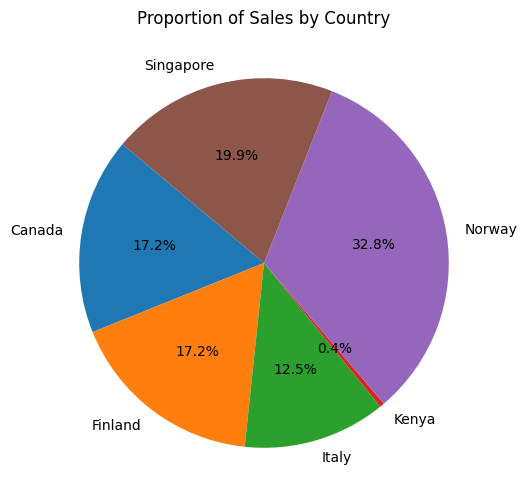

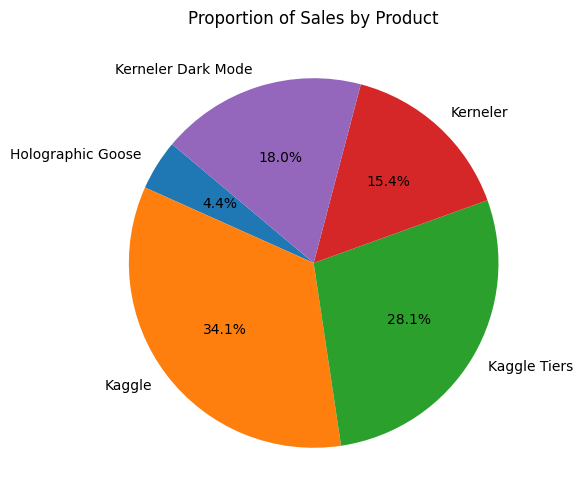

In [28]:
# 1. Pie Chart for `num_sold` against `store`, `country`, and `product`
categories = ['store', 'country', 'product']
for category in categories:
    aggregated = train_data.groupby(category)['num_sold'].sum()
    plt.figure(figsize=(8, 6))
    plt.pie(aggregated, labels=aggregated.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of Sales by {category.capitalize()}')
    plt.show()


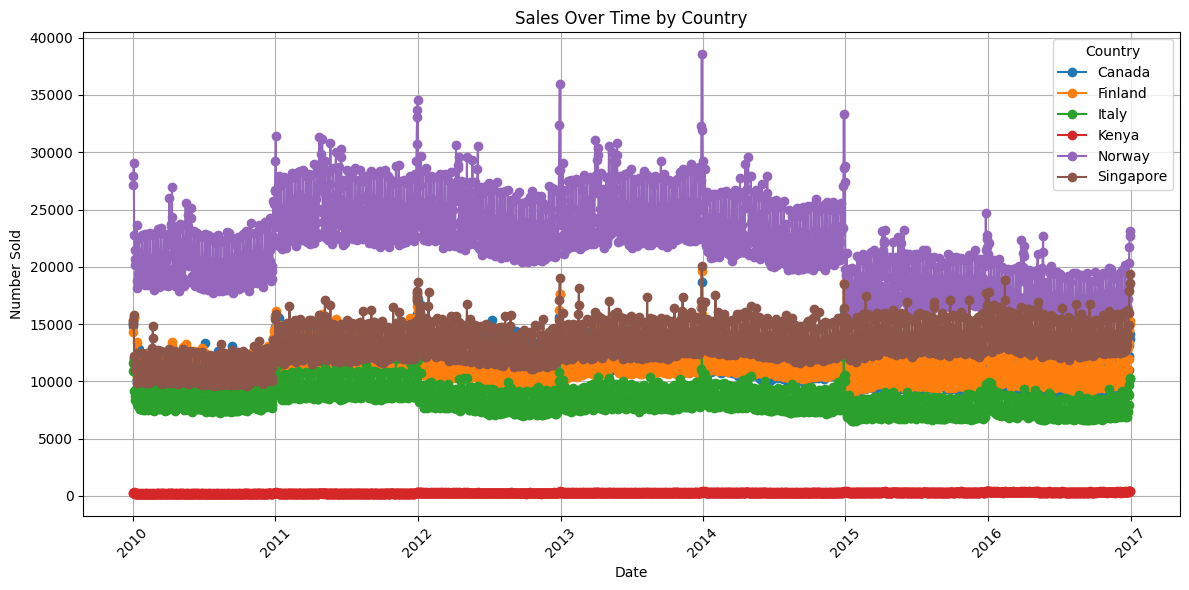

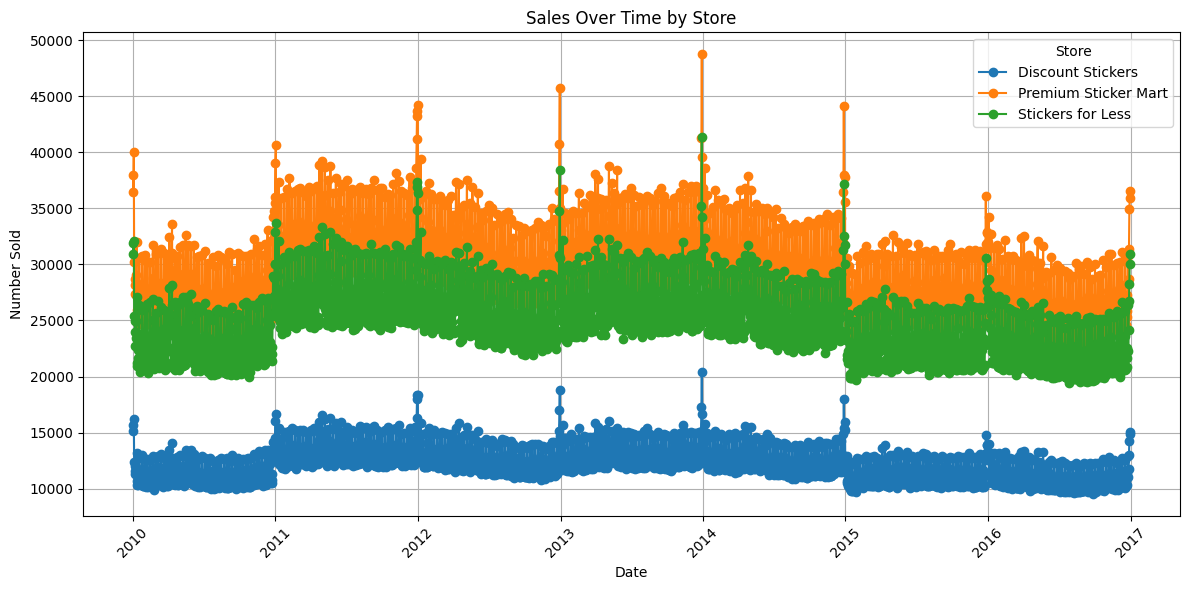

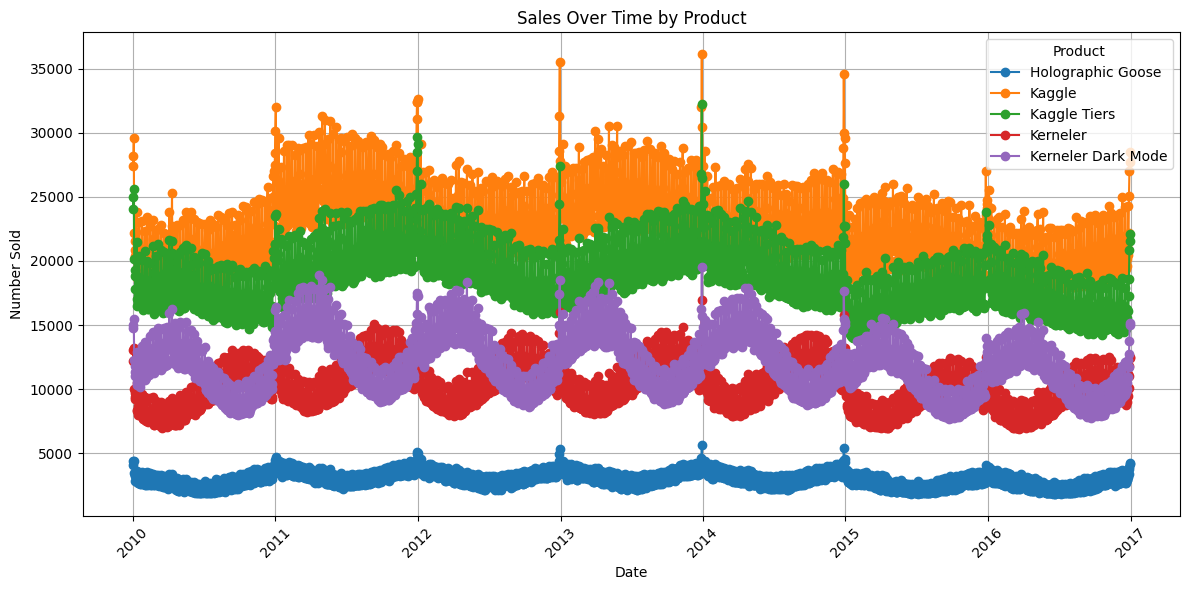

In [29]:
# Function to plot grouped data
def plot_grouped_data(df, group_column, title):
    grouped = df.groupby([group_column, 'date'])['num_sold'].sum().reset_index()
    unique_groups = grouped[group_column].unique()

    plt.figure(figsize=(12, 6))
    for group in unique_groups:
        group_data = grouped[grouped[group_column] == group]
        plt.plot(group_data['date'], group_data['num_sold'], marker='o', label=f"{group}")

    plt.xlabel('Date')
    plt.ylabel('Number Sold')
    plt.title(title)
    plt.legend(title=group_column.capitalize())
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for each category
plot_grouped_data(train_data, 'country', 'Sales Over Time by Country')
plot_grouped_data(train_data, 'store', 'Sales Over Time by Store')
plot_grouped_data(train_data, 'product', 'Sales Over Time by Product')

##Checking skewness of target variable

In [30]:
import numpy as np
print(train_data['num_sold'].skew())  # A skewness > 1 suggests log transformation might help


1.415373452498392


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


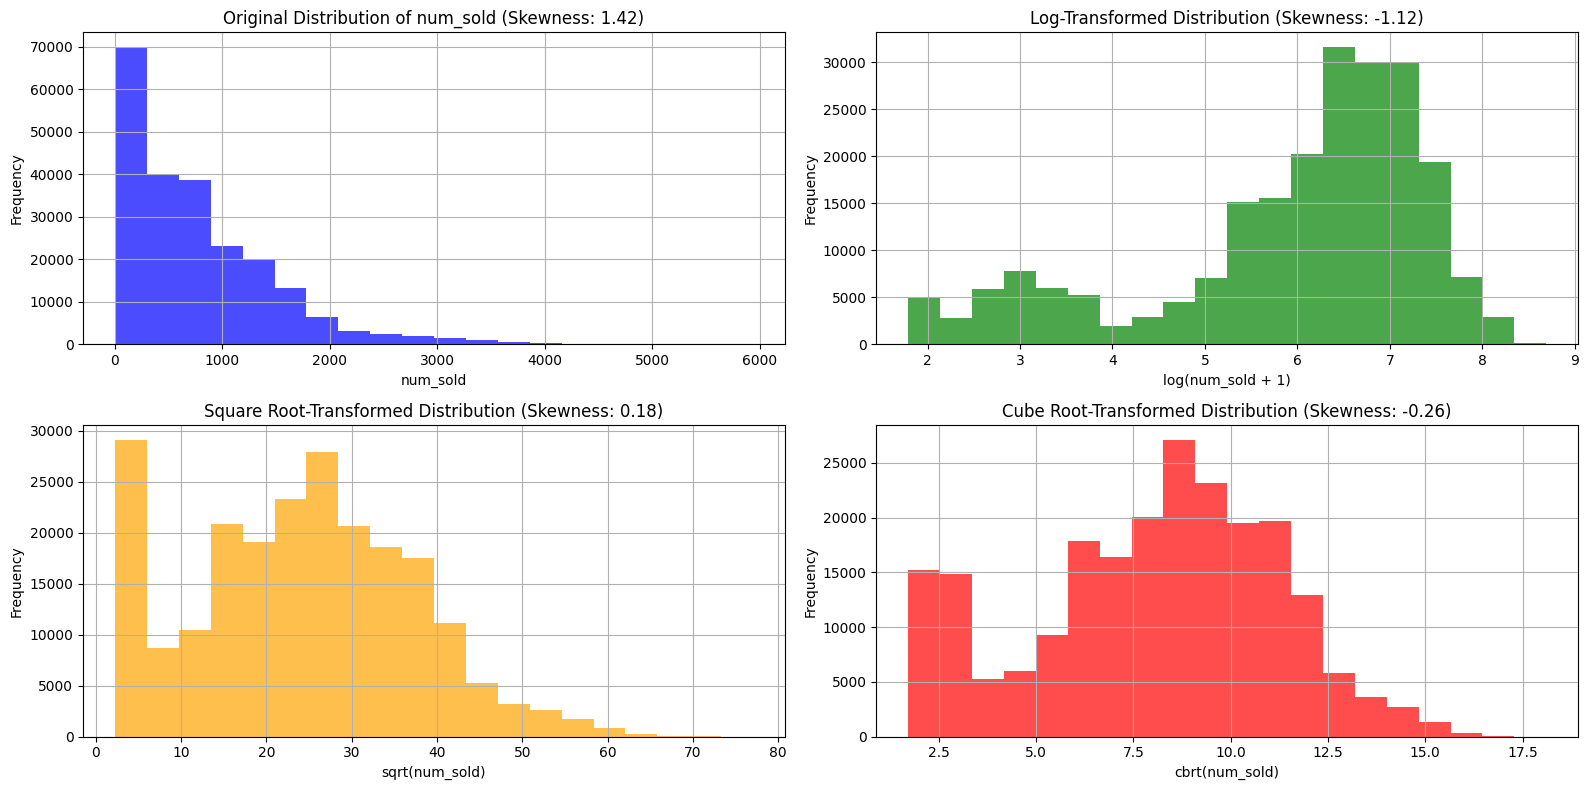

In [31]:
# Create transformed versions of num_sold
train_data['log_num_sold'] = np.log(train_data['num_sold'] + 1)  # Add 1 to avoid issues with zeros
train_data['sqrt_num_sold'] = np.sqrt(train_data['num_sold'])
train_data['cbrt_num_sold'] = np.cbrt(train_data['num_sold'])

# Calculate skewness for each column
skewness_original = train_data['num_sold'].skew()
skewness_log = train_data['log_num_sold'].skew()
skewness_sqrt = train_data['sqrt_num_sold'].skew()
skewness_cbrt = train_data['cbrt_num_sold'].skew()

# Plot distributions with skewness in titles
plt.figure(figsize=(16, 8))

# Original data
plt.subplot(2, 2, 1)
train_data['num_sold'].hist(bins=20, color='blue', alpha=0.7)
plt.title(f'Original Distribution of num_sold (Skewness: {skewness_original:.2f})')
plt.xlabel('num_sold')
plt.ylabel('Frequency')

# Log-transformed data
plt.subplot(2, 2, 2)
train_data['log_num_sold'].hist(bins=20, color='green', alpha=0.7)
plt.title(f'Log-Transformed Distribution (Skewness: {skewness_log:.2f})')
plt.xlabel('log(num_sold + 1)')
plt.ylabel('Frequency')

# Square root-transformed data
plt.subplot(2, 2, 3)
train_data['sqrt_num_sold'].hist(bins=20, color='orange', alpha=0.7)
plt.title(f'Square Root-Transformed Distribution (Skewness: {skewness_sqrt:.2f})')
plt.xlabel('sqrt(num_sold)')
plt.ylabel('Frequency')

# Cube root-transformed data
plt.subplot(2, 2, 4)
train_data['cbrt_num_sold'].hist(bins=20, color='red', alpha=0.7)
plt.title(f'Cube Root-Transformed Distribution (Skewness: {skewness_cbrt:.2f})')
plt.xlabel('cbrt(num_sold)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
train_data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold,holiday,day_of_week,season,fiscal_quarter,near_new_year,near_start_of_month,log_num_sold,sqrt_num_sold,cbrt_num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,True,Friday,winter,4,True,True,NaN,NaN,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,True,Friday,winter,4,True,True,6.881411,31.192948,9.909178
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,True,Friday,winter,4,True,True,6.810142,30.099834,9.676302
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,True,Friday,winter,4,True,True,6.049733,20.566964,7.506661
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,True,Friday,winter,4,True,True,6.198479,22.158520,7.889095


#Training

##Preparing dataframe for training

In [33]:
# Ensure 'date' column is in datetime format
train_data['date'] = pd.to_datetime(train_data['date'])

In [34]:
train_data.dtypes

id                              int64
date                   datetime64[ns]
country                        object
store                          object
product                        object
num_sold                      float64
holiday                          bool
day_of_week                    object
season                         object
fiscal_quarter                  int64
near_new_year                    bool
near_start_of_month              bool
log_num_sold                  float64
sqrt_num_sold                 float64
cbrt_num_sold                 float64
dtype: object

In [35]:
# Rename 'date' column to 'timestamp' to match AutoGluon's expected format
train_data.rename(columns={'date': 'timestamp'}, inplace=True)


In [36]:
# Create the 'item_id' column that combines 'country', 'store', and 'product' to uniquely identify time series, since this will be used, the 3 columns are not required to be input in model separately
train_data['item_id'] = train_data['country'] + '_' + train_data['store'] + '_' + train_data['product']


In [37]:
train_data['item_id'].nunique()

90

##Training

In [38]:
# Step 1: Prepare data for TimeSeriesDataFrame
# Assuming train_data already has columns: 'timestamp', 'item_id', 'holiday', and 'sqrt_num_sold'
train_data_ts = TimeSeriesDataFrame(train_data[['timestamp', 'item_id', 'holiday', 'day_of_week','season', 'fiscal_quarter', 'near_new_year', 'near_start_of_month', 'sqrt_num_sold']])

# Step 2: Handle missing values in TimeSeriesDataFrame
# This uses forward fill followed by backward fill by default
train_data_ts = train_data_ts.fill_missing_values()

# Step 3: Adjust frequency (e.g., 'D' for daily)
train_data_ts.convert_frequency(freq='D')

# Step 4: Initialize the TimeSeriesPredictor
predictor = TimeSeriesPredictor(
    target='sqrt_num_sold',
    prediction_length=test_data['date'].nunique(),  # Predicting for number of unique dates in test_data
    freq='D',
    eval_metric='MAPE'  # Set MAPE as the evaluation metric
)

# Step 5: Specify GPU usage for deep learning models
hyperparameters = {
    "DeepAR": {"use_gpu": True},  # Enable GPU for DeepAR
    "TemporalFusionTransformer": {"use_gpu": True},  # Enable GPU for TFT
    "PatchTST": {"use_gpu": True},  # Enable GPU for PatchTST
    "TiDE": {"use_gpu": True}  # Enable GPU for TiDE
}

# Step 6: Fit the model with the data
predictor.fit(train_data_ts, presets='best_quality', hyperparameters=hyperparameters)

# Step 7: Retrieve model performance and sort by MAPE
performance = predictor.leaderboard(train_data_ts, silent=True)
performance_sorted = performance[['model', 'score_val']].sort_values(by='score_val', ascending=True)

# Step 8: Print MAPE of models in increasing order
print("MAPE of models in increasing order:")
print(performance_sorted)

Trying to fill missing values in an unsorted dataframe. It is highly recommended to call `ts_df.sort_index()` before calling `ts_df.fill_missing_values()`
No path specified. Models will be saved in: "AutogluonModels/ag-20250123_065214"
Beginning AutoGluon training...
AutoGluon will save models to '/kaggle/working/AutogluonModels/ag-20250123_065214'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
GPU Count:          2
Memory Avail:       30.03 GB / 31.35 GB (95.8%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MAPE,
 'freq': 'D',
 'hyperparameters': {'DeepAR': {'use_gpu': True},
                     'PatchTST': {'use_gpu': True},
                     'TemporalFusionTransformer': {'use_gp

MAPE of models in increasing order:
                       model  score_val
4                       TiDE  -0.239281
3                   PatchTST  -0.121724
2  TemporalFusionTransformer  -0.103799
1                     DeepAR  -0.069308
0           WeightedEnsemble  -0.061903


#Forecast

##Making same transformations to test_data

In [39]:
test_data.dtypes

id                              int64
date                   datetime64[ns]
country                        object
store                          object
product                        object
holiday                          bool
day_of_week                    object
season                         object
fiscal_quarter                  int64
near_new_year                    bool
near_start_of_month              bool
dtype: object

In [40]:
#convert date to detetime
test_data['date'] = pd.to_datetime(test_data['date'])

In [41]:
# Rename 'date' column to 'timestamp' to match AutoGluon's expected format
test_data.rename(columns={'date': 'timestamp'}, inplace=True)
print(test_data['timestamp'].dtype)

datetime64[ns]


In [42]:
# Create 'item_id' for future data
test_data['item_id'] = test_data['country'] + '_' + test_data['store'] + '_' + test_data['product']

In [43]:
test_data['item_id'] = test_data['item_id'].astype(str)

In [44]:
test_data.columns

Index(['id', 'timestamp', 'country', 'store', 'product', 'holiday',
       'day_of_week', 'season', 'fiscal_quarter', 'near_new_year',
       'near_start_of_month', 'item_id'],
      dtype='object')

In [45]:
# Prepare future data as TimeSeriesDataFrame
test_data_filtered = test_data[['timestamp', 'item_id', 'holiday']]
test_data_filtered = test_data_filtered.set_index(['item_id', 'timestamp'])
test_data_ts = TimeSeriesDataFrame(test_data_filtered)#filtering out required columns for prediction


In [46]:
print(test_data_ts.index.names)
print(test_data_ts.columns)
print(test_data.head())

['item_id', 'timestamp']
Index(['holiday'], dtype='object')
       id  timestamp country              store             product  holiday  \
0  230130 2017-01-01  Canada  Discount Stickers   Holographic Goose     True   
1  230131 2017-01-01  Canada  Discount Stickers              Kaggle     True   
2  230132 2017-01-01  Canada  Discount Stickers        Kaggle Tiers     True   
3  230133 2017-01-01  Canada  Discount Stickers            Kerneler     True   
4  230134 2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode     True   

  day_of_week  season  fiscal_quarter  near_new_year  near_start_of_month  \
0      Sunday  winter               4           True                 True   
1      Sunday  winter               4           True                 True   
2      Sunday  winter               4           True                 True   
3      Sunday  winter               4           True                 True   
4      Sunday  winter               4           True                 True 

##Forecasting

In [47]:
# Make predictions for sqrt_num_sold
future_forecast = predictor.predict(data=train_data_ts)
future_forecast


Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean  \
item_id                                           timestamp               
Canada_Discount Stickers_Holographic Goose        2017-01-01   1.530417   
                                                  2017-01-02   1.165918   
                                                  2017-01-03   1.361234   
                                                  2017-01-04   1.368112   
                                                  2017-01-05   1.390207   
...                                                                 ...   
Singapore_Premium Sticker Mart_Kerneler Dark Mode 2019-12-27  28.785495   
                                                  2019-12-28  29.701419   
                                                  2019-12-29  30.934324   
                                                  2019-12-30  28.291535   
                                                  2019-12-31  27.879429   

                                                                    0.1  \
item_id                                           timestamp               
Canada_Discount Stickers_Holographic Goose        2017-01-01  -1.172971   
                                                  2017-01-02  -0.978270   
                                                  2017-01-03  -1.301898   
                                                  2017-01-04  -1.419730   
                                                  2017-01-05  -1.302710   
...                                                                 ...   
Singapore_Premium Sticker Mart_Kerneler Dark Mode 2019-12-27  26.410495   
                                                  2019-12-28  27.376706   
                                                  2019-12-29  28.148726   
                                                  2019-12-30  25.962698   
                                                  2019-12-31  25.539072   

                                                                    0.2  \
item_id                                           timestamp               
Canada_Discount Stickers_Holographic Goose        2017-01-01  -0.162047   
                                                  2017-01-02   0.002845   
                                                  2017-01-03  -0.389173   
                                                  2017-01-04  -0.402487   
                                                  2017-01-05  -0.334080   
...                                                                 ...   
Singapore_Premium Sticker Mart_Kerneler Dark Mode 2019-12-27  27.120461   
                                                  2019-12-28  28.052778   
                                                  2019-12-29  29.020934   
                                                  2019-12-30  26.785603   
                                                  2019-12-31  26.319976   

                                                                    0.3  \
item_id                                           timestamp               
Canada_Discount Stickers_Holographic Goose        2017-01-01   0.596664   
                                                  2017-01-02   0.428038   
                                                  2017-01-03   0.237706   
                                                  2017-01-04   0.391988   
                                                  2017-01-05   0.366622   
...                                                                 ...   
Singapore_Premium Sticker Mart_Kerneler Dark Mode 2019-12-27  27.836562   
                                                  2019-12-28  28.713811   
                                                  2019-12-29  29.709900   
                                                  2019-12-30  27.402471   
                                                  2019-12-31  26.952721   

                                                                    0.4  \
item_id                                           timestamp               
Canada_Discou

In [48]:
future_forecast.columns

Index(['mean', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], dtype='object')

In [49]:
# Convert sqrt_num_sold predictions back to num_sold
future_forecast['num_sold'] = future_forecast['mean']**2

##Doing a Left Join Operation to get correct num_sold for each id

In [50]:
#left join future forecast to test_data to get correct ids with the num_sold forecast
final_forecast = future_forecast.merge(test_data[['id', 'item_id', 'timestamp']],
                                       on=['item_id', 'timestamp'],
                                       how='left')
# Display the predictions
print("Future predictions for num_sold:")
print(final_forecast[['id', 'num_sold']])

Future predictions for num_sold:
           id    num_sold
0      230130    2.342175
1      230220    1.359366
2      230310    1.852959
3      230400    1.871731
4      230490    1.932675
...       ...         ...
98545  328319  828.604736
98546  328409  882.174305
98547  328499  956.932398
98548  328589  800.410929
98549  328679  777.262536

[98550 rows x 2 columns]


In [51]:
final_forecast.columns

Index(['item_id', 'timestamp', 'mean', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', 'num_sold', 'id'],
      dtype='object')

##Checking if any value is NaN or missing

In [52]:
#Check for NaN values in all columns
future_forecast.isnull().any()

mean        False
0.1         False
0.2         False
0.3         False
0.4         False
0.5         False
0.6         False
0.7         False
0.8         False
0.9         False
num_sold    False
dtype: bool

In [53]:
# Convert both columns to lists
final_forecast_ids = final_forecast['id'].tolist()
submission_format_ids = submission_format['id'].tolist()

difference = list(set(submission_format_ids)-set(final_forecast_ids))
difference #empty list implies no difference so our output matches expected submission format

[]

#Saving required dataframe

In [54]:
#save final_forecast['id', 'num_sold']
final_forecast[['id', 'num_sold']].to_csv('/kaggle/working/submission.csv', index=False)

#Plotting forecast

#Saving model

Got Temporal Fusion Transformer as best model

In [55]:
'''# Get the name of the best model
best_model = predictor.model_best

# Extract the best model's object
best_model_obj = predictor._trainer.load_model(best_model)

# Save the best model separately
import pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model_obj, f)

print(f"Best model '{best_model}' saved as 'best_model.pkl'")'''

'# Get the name of the best model\nbest_model = predictor.model_best\n\n# Extract the best model\'s object\nbest_model_obj = predictor._trainer.load_model(best_model)\n\n# Save the best model separately\nimport pickle\nwith open("best_model.pkl", "wb") as f:\n    pickle.dump(best_model_obj, f)\n\nprint(f"Best model \'{best_model}\' saved as \'best_model.pkl\'")'

In [56]:
'''from google.colab import files

# Download the saved best model file
files.download("best_model.pkl")'''

'from google.colab import files\n\n# Download the saved best model file\nfiles.download("best_model.pkl")'